<a href="https://colab.research.google.com/github/joaquinparodi/TP1-DATOS/blob/main/tp2orga_joaquin_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
!pip install ptitprince
import ptitprince as pt
import pandas as pd
import numpy as np


     |████████████████████████████████| 61kB 2.7MB/s 
  Created wheel for ptitprince: filename=ptitprince-0.2.5-cp36-none-any.whl size=8428 sha256=3ea7476f1ece944b0b1e70b709567e60e46b4cd0d9061cb71f95b290c0693953
  Stored in directory: /root/.cache/pip/wheels/fb/c1/75/2ef8da161053bdf8e03f9a360f426accd4fac1ddf7f6ed0029
Successfully built ptitprince


In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
 
id='1MfnxlPGSmr-i1up_2iKCkrBIMcDHomnK'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('data.csv')

In [ ]:
id='1kZt5ZN2eAyeNEIWLh6lGckgyDIxpHN4f'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test.csv')

In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
class Modelo():
  def __init__(self ):
    pass



  def splitTrainTarget(self,entrenamientoFeatureTarget):
    #separo  mi dataframe en X= feature engineri e y= target
    target='Stage'
    listColumns=dfNew.columns.to_list()
    listColumns.remove('Stage')
    listColumns.remove('Opportunity_ID')
    listColumns
    X,y=entrenamientoFeatureTarget[listColumns], entrenamientoFeatureTarget[target]
    print("las columnas del train son {} y del target son  {}".format(X.columns , y.name ))
    return X,y

  def SplitTrainTest(self,X,y):
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

    return X_train, X_test, y_train, y_test


  def entrenarYPredecirMismoSetEntrenamiento(self,X_train,y_train,X_test): 
    self.modelo.fit(X_train, y_train)
    preds =  self.modelo.predict(X_test)
    return preds

  def errorSetEntrenamiento( self,X_train,y_train,X_test,y_test):
     preds= self.entrenarYPredecirMismoSetEntrenamiento( X_train,y_train,X_test)
     rmse = np.sqrt(mean_squared_error(y_test, preds))
     print("RMSE: %f" % (rmse)) 



  def entrenarYPredecirWithTest(self,X_train,y_train,dfFeaturestest):
    
    
    dfFeaturestest=dfFeaturestest[X_train.columns.to_list()]
    self.modelo.fit(X_train, y_train)
    preds =  self.modelo.predict(dfFeaturestest)
    return preds  

  

  def agregarTargetDfOriginal(self,entrenamiento,df):
    #df es un dataframe ya agregado con features nuevos
    #entrenamiento es el dataframe orginal sin procesar
    target=entrenamiento[(entrenamiento['Stage']=='Closed Lost') | (entrenamiento['Stage']=='Closed Won')]
    target=target[['Opportunity_ID','Stage']].groupby(['Opportunity_ID','Stage']).agg(total=('Stage','count')).reset_index()[['Opportunity_ID','Stage']]
      
    entrenamiento=pd.merge(df,target,on="Opportunity_ID",how="inner") 
    df=entrenamiento.replace("Closed Lost", "0")
    df=df.replace("Closed Won", "1")
  
    return df

  #feature engnerie
  def featureEngeenier(self,df):
    "obsevar que df es el test original"
    #agregamos fecha 
    df['Month']=pd.to_datetime(df['Month'])
    df['anio']=df['Month'].dt.year
    df['mes']=df['Month'].dt.month
    #agregamos columna totalamount
    totalAmount=df.groupby(['Opportunity_ID' ]).agg(totalamount=('Total_Amount','sum'))
    #agregamos total trf
    totalTrf=df.groupby(['Opportunity_ID' ]).agg(totalTrf=('TRF','sum'))
    dfFeatureNew=pd.merge(totalAmount,totalTrf,on="Opportunity_ID",how="inner").reset_index()

    df=dfFeatureNew[['Opportunity_ID','totalamount','totalTrf']]
    
    return df


  def formarDfKaggle(self ,preds ):
    test=pd.read_csv('test.csv')
    testAux2=test.groupby(['Opportunity_ID','Territory' ]).agg(cant=('Opportunity_ID','count')).reset_index()[['Opportunity_ID' ]]
 
    dfkaggle = pd.DataFrame( preds)
    dfkaggle['Opportunity_ID']=testAux2['Opportunity_ID']
    dfkaggle.columns=['Target','Opportunity_ID']
    dfkaggle=dfkaggle[['Opportunity_ID','Target']]
    
    from google.colab import files
    dfkaggle.to_csv('dfKaggle.csv', index=False) 
    files.download('dfKaggle.csv')
   
  def featureImportancia(self,X_train):
    # Gini importance
    self.modelo.feature_importances_
    plt.bar(X_train.columns, self.modelo.feature_importances_)
    plt.xlabel('Features')
    plt.ylabel('Importancia')
    plt.title('Importancia Features con RF')
    plt.show()


In [ ]:
class RandomForestRegre(Modelo):
  def __init__(self,hiperparametros):
    super().__init__()
    self.modelo= RandomForestRegressor(random_state=1,n_estimators=20)


class xgbosst(Modelo):
  def __init__(self,hiperparametros):
    super().__init__()
    self.modelo= xgb.XGBRegressor(objective ='reg:squarederror', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 500)
  


  # este polimorfismo es porque pedia el xgboost que y_train sea de tipo int
  def entrenarYPredecirMismoSetEntrenamiento(self,X_train,y_train,X_test): 
    self.modelo.fit(X_train, y_train.astype(int))
    preds =  self.modelo.predict(X_test)
     
    return preds

  def errorSetEntrenamiento( self,X_train,y_train,X_test,y_test):
    #aca la diferencia es que ytrain debe ser entero
     
    preds= self.entrenarYPredecirMismoSetEntrenamiento( X_train,y_train,X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print("RMSE: %f" % (rmse))

  def entrenarYPredecirWithTest(self,X_train,y_train,dfFeaturestest):
     
    dfFeaturestest=dfFeaturestest[X_train.columns.to_list()]
    self.modelo.fit(X_train, y_train.astype(int))
    preds =  self.modelo.predict(dfFeaturestest)
    return preds  


In [ ]:
#1)Apertura
entrenamiento = pd.read_csv('data.csv')
df=entrenamiento 

In [ ]:
random_state=1
n_estimators=20
#aca agregamos los hiperparametros que estamos probando
Hiperparametros=[random_state ,n_estimators ]
#por ahora no se usan los hirparametros, se setea dentro de las clase estos,
#pero la idea es que se pueda setear desde afuera para probar

In [ ]:
modelos={
         'ramdomForest': RandomForestRegre(Hiperparametros),
         'xgboost':xgbosst(Hiperparametros)
}

In [ ]:


modelo=modelos.get('xgboost')
#cargamos el modelo 
modelo=modelo
#hacemos feature engierine sobre el df original
dfFeature=modelo.featureEngeenier(entrenamiento)
dfFeature.head()
#le agregamos el target
dfFeatureWithTarget=modelo.agregarTargetDfOriginal(entrenamiento,dfFeature)
dfFeatureWithTarget.head()

,Opportunity_ID,totalamount,totalTrf,Stage
0,0,5272800.0,10,0
1,1,48230.0,0,1
2,2,83865.6,0,1
3,3,7421881.5,14,0
4,4,13357192.5,25,0


In [ ]:
def agregarMeanEncoding(dfWithFeatureTarget,columnCategorica):
  """dfWithFeature es un df de formato ['Opportunity_ID', y columnas nuevas agregadas anteriormente,target]
  se hace minencoding columancategoria, retorna un df con opportunity_id, meanencoding,columnas nuevas agregadas anteriormente
      """
  df = pd.read_csv('data.csv')
  entrenamiento = pd.read_csv('data.csv')
  df = df.replace('Closed Won', '1')
  df = df.replace('Closed Lost', '0')
  df = df[df['Stage'].isin(['0','1'])]
  df.Stage = df.Stage.astype(int)
  df = df.groupby([columnCategorica,'Opportunity_ID']).agg({'Stage':['sum','count']})
  df = df.reset_index()
  df1 = df
  df1.columns = [columnCategorica,'Opportunity_ID','Stage_sum','Stage_count']
  df1['Stage_sum'] = df1['Stage_sum'].apply(lambda x: 0 if x == 0 else 1)
  df2 = df1.groupby([columnCategorica]).agg(meanEncodingTerritory = ('Stage_sum','mean'))
  df2 = df2.reset_index()
  agruparOportunity=entrenamiento.groupby(['Opportunity_ID',columnCategorica]).agg(cant=(columnCategorica,'count')).reset_index()
  result=pd.merge(agruparOportunity,df2,on=columnCategorica,how='inner')
  #eliminamos columnas que no sirve, columncategorica porque la reemplazamos por el mean enconding, y cant que 
  #la usamos para unificar por oportunity_id 
  del result['cant']
  del result['Territory']
  result2=pd.merge(dfWithFeatureTarget, result, on='Opportunity_ID' , how='inner')
  
  dfWithFeatureTarget=result2
  dfWithFeatureTarget.Stage = dfWithFeatureTarget.Stage.astype(int)
  return dfWithFeatureTarget

In [ ]:
dfNew=agregarMeanEncoding(dfFeatureWithTarget,'Territory')
dfNew.head()

,Opportunity_ID,totalamount,totalTrf,Stage,meanEncodingTerritory
0,0,5272800.0,10,0,0.535927
1,1,48230.0,0,1,0.535927
2,2,83865.6,0,1,0.632723
3,3,7421881.5,14,0,0.632723
4,4,13357192.5,25,0,0.632723


In [ ]:
X,y=modelo.splitTrainTarget(dfNew)

las columnas del train son Index(['totalamount', 'totalTrf', 'meanEncodingTerritory'], dtype='object') y del target son  Stage


In [ ]:
X_train, X_test, y_train, y_test=modelo.SplitTrainTest(X,y)

In [ ]:
X_train

,totalamount,totalTrf,meanEncodingTerritory
6509,323212.5,0,0.813953
6914,463600.0,0,0.535927
2464,1679730.0,5,0.593750
913,498771.0,1,0.367953
4986,52126.0,0,0.379310
...,...,...,...
9785,1307775.0,3,0.548148
7763,103125.0,0,0.593750
5218,292410.0,1,0.417755
1346,326340.0,0,0.802326


In [ ]:
#entrenamo y predecimos, y comparamos con el valor real y vemos su error
modelo.errorSetEntrenamiento(  X_train,y_train,X_test,y_test) 

RMSE: 0.419838


# aca vamos a entrenar y predecir con el test para subir a kaggle

In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
testFeature=modelo.featureEngeenier(test)
testFeature.head()

,Opportunity_ID,totalamount,totalTrf
0,10689,367419.0,0
1,10690,757783.5,1
2,10691,21037.5,0
3,10692,2169106.5,6
4,10693,5752.5,0


In [ ]:
def meanEncodingDejandoColumnaCategorica(columnsCategory):
  """devuelve un dataframe con el formato [columnscategory,meanencodingcategory]
    es porque lo vamos a usar para hacer merge por su columna categorica"""
  df = pd.read_csv('data.csv')
  entrenamiento = pd.read_csv('data.csv')
  df = df.replace('Closed Won', '1')
  df = df.replace('Closed Lost', '0')
  df = df[df['Stage'].isin(['0','1'])]
  df.Stage = df.Stage.astype(int)
  df = df.groupby([columnsCategory,'Opportunity_ID']).agg({'Stage':['sum','count']})
  df = df.reset_index()
  df1 = df
  df1.columns = [columnsCategory,'Opportunity_ID','Stage_sum','Stage_count']
  df1['Stage_sum'] = df1['Stage_sum'].apply(lambda x: 0 if x == 0 else 1)
  df2 = df1.groupby([columnsCategory]).agg(meanEncodingTerritory = ('Stage_sum','mean'))
  df2 = df2.reset_index()
  agruparOportunity=entrenamiento.groupby(['Opportunity_ID',columnsCategory]).agg(cant=(columnsCategory,'count')).reset_index()
  result=pd.merge(agruparOportunity,df2,on=columnsCategory,how='inner')
  result.head()
  del result['cant']
  result2=result[[columnsCategory,'meanEncodingTerritory']].drop_duplicates()
  return  result2

In [ ]:
dfMeanEncoding=meanEncodingDejandoColumnaCategorica("Territory")
dfMeanEncoding.head()

,Territory,meanEncodingTerritory
0,None,0.535927
1867,NW America,0.632723
2745,India,0.457227
3425,Italy,0.432692
3633,Germany,0.548148


In [ ]:
testAux=test.groupby(['Opportunity_ID','Territory' ]).agg(cant=('Opportunity_ID','count')).reset_index()[['Opportunity_ID','Territory' ]]
testAux.head()

,Opportunity_ID,Territory
0,10689,Germany
1,10690,Germany
2,10691,NE America
3,10692,NW America
4,10693,NW America


In [ ]:
territories=pd.merge(testAux,dfMeanEncoding, on="Territory", how='left') 
territories

,Opportunity_ID,Territory,meanEncodingTerritory
0,10689,Germany,0.548148
1,10690,Germany,0.548148
2,10691,NE America,0.347490
3,10692,NW America,0.632723
4,10693,NW America,0.632723
...,...,...,...
1562,12364,KSA,0.416667
1563,12365,SE America,0.367953
1564,12366,SE America,0.367953
1565,12367,NE America,0.347490


In [ ]:
 testFinal=pd.merge(testFeature,territories, on="Opportunity_ID", how='inner') 
 testFinal

,Opportunity_ID,totalamount,totalTrf,Territory,meanEncodingTerritory
0,10689,367419.0,0,Germany,0.548148
1,10690,757783.5,1,Germany,0.548148
2,10691,21037.5,0,NE America,0.347490
3,10692,2169106.5,6,NW America,0.632723
4,10693,5752.5,0,NW America,0.632723
...,...,...,...,...,...
1562,12364,147750.0,0,KSA,0.416667
1563,12365,45054.9,0,SE America,0.367953
1564,12366,100122.0,0,SE America,0.367953
1565,12367,143220.0,0,NE America,0.347490


In [ ]:
columnsCategoria="Territory"

listColumns=testFinal.columns.to_list()
listColumns.remove(columnsCategoria)
listColumns.remove('Opportunity_ID')
listColumns
testFinal=testFinal[listColumns]

In [ ]:
#X_train, y_test se sacan del df entrenamiento

In [ ]:
X_train

,totalamount,totalTrf,meanEncodingTerritory
6509,323212.5,0,0.813953
6914,463600.0,0,0.535927
2464,1679730.0,5,0.593750
913,498771.0,1,0.367953
4986,52126.0,0,0.379310
...,...,...,...
9785,1307775.0,3,0.548148
7763,103125.0,0,0.593750
5218,292410.0,1,0.417755
1346,326340.0,0,0.802326


In [ ]:
y_train

6509    1
6914    1
2464    0
913     0
4986    1
       ..
9785    0
7763    1
5218    0
1346    1
3582    0
Name: Stage, Length: 7832, dtype: int64

In [ ]:
testFinal

,totalamount,totalTrf,meanEncodingTerritory
0,367419.0,0,0.548148
1,757783.5,1,0.548148
2,21037.5,0,0.347490
3,2169106.5,6,0.632723
4,5752.5,0,0.632723
...,...,...,...
1562,147750.0,0,0.416667
1563,45054.9,0,0.367953
1564,100122.0,0,0.367953
1565,143220.0,0,0.347490


In [ ]:
prediccion=modelo.entrenarYPredecirWithTest(X_train,y_train,testFinal)

In [ ]:
len(prediccion)

1567

In [ ]:
#se pasa testFinal porque posee
modelo.formarDfKaggle(  prediccion)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

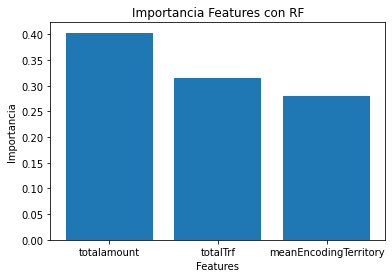

In [ ]:
modelo.featureImportancia( X_train)

# **AHORA VAMOS A PROBAR CON RANDOM FOREST**

In [ ]:
#1)Apertura
entrenamiento = pd.read_csv('data.csv')
df=entrenamiento 

In [ ]:
random_state=1
n_estimators=20
#aca agregamos los hiperparametros que estamos probando
Hiperparametros=[random_state ,n_estimators ]
#por ahora no se usan los hirparametros, se setea dentro de las clase estos,
#pero la idea es que se pueda setear desde afuera para probar

In [ ]:
modelos={
         'ramdomForest': RandomForestRegre(Hiperparametros),
         'xgboost':xgbosst(Hiperparametros)
}

In [ ]:


modelo=modelos.get('ramdomForest')
#cargamos el modelo 
modelo=modelo
#hacemos feature engierine sobre el df original
dfFeature=modelo.featureEngeenier(entrenamiento)
dfFeature.head()
#le agregamos el target
dfFeatureWithTarget=modelo.agregarTargetDfOriginal(entrenamiento,dfFeature)
dfFeatureWithTarget.head()

,Opportunity_ID,totalamount,totalTrf,Stage
0,0,5272800.0,10,0
1,1,48230.0,0,1
2,2,83865.6,0,1
3,3,7421881.5,14,0
4,4,13357192.5,25,0


In [ ]:
def agregarMeanEncoding(dfWithFeatureTarget,columnCategorica):
  """dfWithFeature es un df de formato ['Opportunity_ID', y columnas nuevas agregadas anteriormente,target]
  se hace minencoding columancategoria, retorna un df con opportunity_id, meanencoding,columnas nuevas agregadas anteriormente
      """
  df = pd.read_csv('data.csv')
  entrenamiento = pd.read_csv('data.csv')
  df = df.replace('Closed Won', '1')
  df = df.replace('Closed Lost', '0')
  df = df[df['Stage'].isin(['0','1'])]
  df.Stage = df.Stage.astype(int)
  df = df.groupby([columnCategorica,'Opportunity_ID']).agg({'Stage':['sum','count']})
  df = df.reset_index()
  df1 = df
  df1.columns = [columnCategorica,'Opportunity_ID','Stage_sum','Stage_count']
  df1['Stage_sum'] = df1['Stage_sum'].apply(lambda x: 0 if x == 0 else 1)
  df2 = df1.groupby([columnCategorica]).agg(meanEncodingTerritory = ('Stage_sum','mean'))
  df2 = df2.reset_index()
  agruparOportunity=entrenamiento.groupby(['Opportunity_ID',columnCategorica]).agg(cant=(columnCategorica,'count')).reset_index()
  result=pd.merge(agruparOportunity,df2,on=columnCategorica,how='inner')
  #eliminamos columnas que no sirve, columncategorica porque la reemplazamos por el mean enconding, y cant que 
  #la usamos para unificar por oportunity_id 
  del result['cant']
  del result['Territory']
  result2=pd.merge(dfWithFeatureTarget, result, on='Opportunity_ID' , how='inner')
  
  dfWithFeatureTarget=result2
  dfWithFeatureTarget.Stage = dfWithFeatureTarget.Stage.astype(int)
  return dfWithFeatureTarget

In [ ]:
dfNew=agregarMeanEncoding(dfFeatureWithTarget,'Territory')
dfNew.head()

,Opportunity_ID,totalamount,totalTrf,Stage,meanEncodingTerritory
0,0,5272800.0,10,0,0.535927
1,1,48230.0,0,1,0.535927
2,2,83865.6,0,1,0.632723
3,3,7421881.5,14,0,0.632723
4,4,13357192.5,25,0,0.632723


In [ ]:
X,y=modelo.splitTrainTarget(dfNew)

las columnas del train son Index(['totalamount', 'totalTrf', 'meanEncodingTerritory'], dtype='object') y del target son  Stage


In [ ]:
X_train, X_test, y_train, y_test=modelo.SplitTrainTest(X,y)

In [ ]:
X_train

,totalamount,totalTrf,meanEncodingTerritory
6509,323212.5,0,0.813953
6914,463600.0,0,0.535927
2464,1679730.0,5,0.593750
913,498771.0,1,0.367953
4986,52126.0,0,0.379310
...,...,...,...
9785,1307775.0,3,0.548148
7763,103125.0,0,0.593750
5218,292410.0,1,0.417755
1346,326340.0,0,0.802326


In [ ]:
#entrenamo y predecimos, y comparamos con el valor real y vemos su error
modelo.errorSetEntrenamiento(  X_train,y_train,X_test,y_test) 

RMSE: 0.467078


# aca vamos a entrenar y predecir con el test para subir a kaggle

In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
testFeature=modelo.featureEngeenier(test)
testFeature.head()

,Opportunity_ID,totalamount,totalTrf
0,10689,367419.0,0
1,10690,757783.5,1
2,10691,21037.5,0
3,10692,2169106.5,6
4,10693,5752.5,0


In [ ]:
def meanEncodingDejandoColumnaCategorica(columnsCategory):
  """devuelve un dataframe con el formato [columnscategory,meanencodingcategory]
    es porque lo vamos a usar para hacer merge por su columna categorica"""
  df = pd.read_csv('data.csv')
  entrenamiento = pd.read_csv('data.csv')
  df = df.replace('Closed Won', '1')
  df = df.replace('Closed Lost', '0')
  df = df[df['Stage'].isin(['0','1'])]
  df.Stage = df.Stage.astype(int)
  df = df.groupby([columnsCategory,'Opportunity_ID']).agg({'Stage':['sum','count']})
  df = df.reset_index()
  df1 = df
  df1.columns = [columnsCategory,'Opportunity_ID','Stage_sum','Stage_count']
  df1['Stage_sum'] = df1['Stage_sum'].apply(lambda x: 0 if x == 0 else 1)
  df2 = df1.groupby([columnsCategory]).agg(meanEncodingTerritory = ('Stage_sum','mean'))
  df2 = df2.reset_index()
  agruparOportunity=entrenamiento.groupby(['Opportunity_ID',columnsCategory]).agg(cant=(columnsCategory,'count')).reset_index()
  result=pd.merge(agruparOportunity,df2,on=columnsCategory,how='inner')
  result.head()
  del result['cant']
  result2=result[[columnsCategory,'meanEncodingTerritory']].drop_duplicates()
  return  result2

In [ ]:
dfMeanEncoding=meanEncodingDejandoColumnaCategorica("Territory")
dfMeanEncoding.head()

,Territory,meanEncodingTerritory
0,None,0.535927
1867,NW America,0.632723
2745,India,0.457227
3425,Italy,0.432692
3633,Germany,0.548148


In [ ]:
testAux=test.groupby(['Opportunity_ID','Territory' ]).agg(cant=('Opportunity_ID','count')).reset_index()[['Opportunity_ID','Territory' ]]
testAux.head()

,Opportunity_ID,Territory
0,10689,Germany
1,10690,Germany
2,10691,NE America
3,10692,NW America
4,10693,NW America


In [ ]:
territories=pd.merge(testAux,dfMeanEncoding, on="Territory", how='left') 
territories

,Opportunity_ID,Territory,meanEncodingTerritory
0,10689,Germany,0.548148
1,10690,Germany,0.548148
2,10691,NE America,0.347490
3,10692,NW America,0.632723
4,10693,NW America,0.632723
...,...,...,...
1562,12364,KSA,0.416667
1563,12365,SE America,0.367953
1564,12366,SE America,0.367953
1565,12367,NE America,0.347490


In [ ]:
 testFinal=pd.merge(testFeature,territories, on="Opportunity_ID", how='inner') 
 testFinal

,Opportunity_ID,totalamount,totalTrf,Territory,meanEncodingTerritory
0,10689,367419.0,0,Germany,0.548148
1,10690,757783.5,1,Germany,0.548148
2,10691,21037.5,0,NE America,0.347490
3,10692,2169106.5,6,NW America,0.632723
4,10693,5752.5,0,NW America,0.632723
...,...,...,...,...,...
1562,12364,147750.0,0,KSA,0.416667
1563,12365,45054.9,0,SE America,0.367953
1564,12366,100122.0,0,SE America,0.367953
1565,12367,143220.0,0,NE America,0.347490


In [ ]:
columnsCategoria="Territory"

listColumns=testFinal.columns.to_list()
listColumns.remove(columnsCategoria)
listColumns.remove('Opportunity_ID')
listColumns
testFinal=testFinal[listColumns]

In [ ]:
#X_train, y_test se sacan del df entrenamiento

In [ ]:
X_train

,totalamount,totalTrf,meanEncodingTerritory
6509,323212.5,0,0.813953
6914,463600.0,0,0.535927
2464,1679730.0,5,0.593750
913,498771.0,1,0.367953
4986,52126.0,0,0.379310
...,...,...,...
9785,1307775.0,3,0.548148
7763,103125.0,0,0.593750
5218,292410.0,1,0.417755
1346,326340.0,0,0.802326


In [ ]:
y_train

6509    1
6914    1
2464    0
913     0
4986    1
       ..
9785    0
7763    1
5218    0
1346    1
3582    0
Name: Stage, Length: 7832, dtype: int64

In [ ]:
testFinal

,totalamount,totalTrf,meanEncodingTerritory
0,367419.0,0,0.548148
1,757783.5,1,0.548148
2,21037.5,0,0.347490
3,2169106.5,6,0.632723
4,5752.5,0,0.632723
...,...,...,...
1562,147750.0,0,0.416667
1563,45054.9,0,0.367953
1564,100122.0,0,0.367953
1565,143220.0,0,0.347490


In [ ]:
testFinal=testFinal.fillna(0)

In [ ]:
prediccion=modelo.entrenarYPredecirWithTest(X_train,y_train,testFinal)

In [ ]:
#se pasa testFinal porque posee
modelo.formarDfKaggle(  prediccion)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
modelo.featureImportancia( X_train)